# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow.

**What are we covering:**

1.   Data (prepare and load)
2.   Build Mode
3.   Fitting the model to data (training)
4.   Making predictions and evaluating a model (inference)
5.   Saving and loading a model
6.   Putting it all together

In [ ]:
import torch
import torch.nn as nn #nn contains all of PyTorch's vuilding blocks for neural networks
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be alomost anything ... in machine learning.



* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. get data into a numerical representation
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using a linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters.**

In [ ]:
# Create *known* parameters
weight = 0.7876
bias = 0.31111

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3111],
         [0.3269],
         [0.3426],
         [0.3584],
         [0.3741],
         [0.3899],
         [0.4056],
         [0.4214],
         [0.4371],
         [0.4529]]))

In [ ]:
len(X) , len(y)

(50, 50)

### **Splitting data into training and test sets** (one of the most important concepts in machine learning in general.)

Let's create a training and test set with our data.

In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train , y_train = X[:train_split],y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

How might we better visualixe our data?

This is where the Data explorer's motto comes in!

**"Visualize, Visualize, Visualize!"**

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  # Ploting training data in blue
  plt.scatter(train_data, train_labels , c='b' ,s=4 , label='Training data')

  # Ploting test data in blue
  plt.scatter(test_data, test_labels , c='y' ,s=4 , label='Test data')

  # Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data , predictions, c='r' , s=4 , label='Predictions')

  # Show legends
  plt.legend(prop={"size": 14})

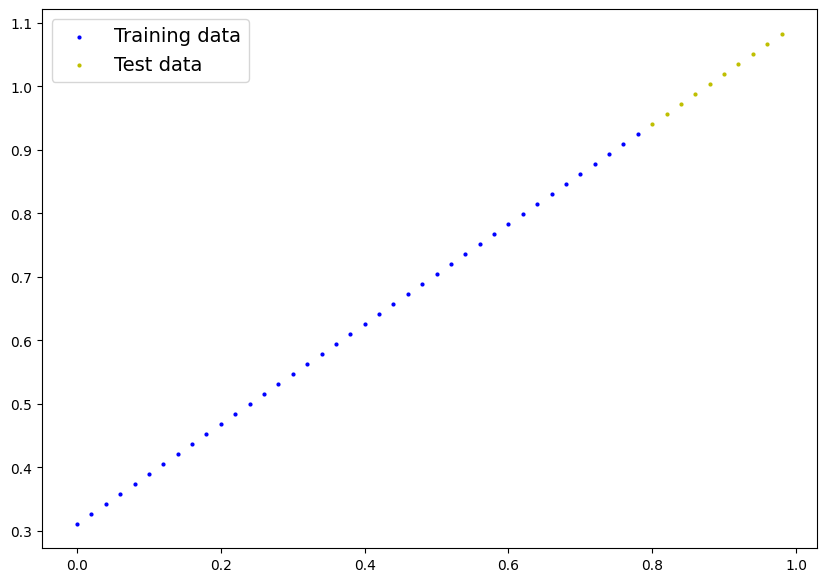

In [ ]:
plot_predictions();

## 2. Build Model

Our first PyTorch model!

To code further we should know about OOP with Python 3, here's a link to help:

https://realpython.com/python3-object-oriented-programming/

**What our model does?**
* Start with random values of weight and bias.
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and biaswe used to create data).

**How does it do so?**
*  Gradient descent
*  Back propagation




In [ ]:
#Create a linear regression model class
class LinearRegressionModel(nn.Module): #<- almost everthing in pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    #Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                           requires_grad=True, # <- can ythis parameter be updated via gradient descent?
                                           dtype=torch.float)) # <- can ythis parameter be updated via gradient descent?

    self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                           requires_grad=True, # <- can ythis parameter be updated via gradient descent?
                                           dtype=torch.float)) # <- can ythis parameter be updated via gradient descent?

  # Forward method to define the computation in the model
  def forward(self, x: torch.tensor) -> torch.tensor: #<- "x" is the input data
    return self.weights * x + self.bias


### PyTrocgh model building essentials

* torch.nn - contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameter should our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn_Module - The base class foe all neural networks modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizer in PyTorch live, they will help with computation
* def forward() - All nn.Module subclasses requires you to overwrite forward(), this method defines what happens in the forward computation

**Essentials:**
https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch Model

Now we have created our PyTorch model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# Create a random seed
torch.manual_seed(1)

# Create an instance of the model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.6614], requires_grad=True),
 Parameter containing:
 tensor([0.2669], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.6614])), ('bias', tensor([0.2669]))])

### Making predictions using `torch.inference_mode()`

To checkour model's predictive power, let's see how well it predicts `y_test` based on `x_test`

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y_test

tensor([[0.9412],
        [0.9569],
        [0.9727],
        [0.9884],
        [1.0042],
        [1.0200],
        [1.0357],
        [1.0515],
        [1.0672],
        [1.0830]])

In [ ]:
# Make predictions with model
with torch.inference_mode(): # inference model lessen the computation by unabling certain functions such as gradient descent here which provides faster predictions
  y_preds = model_0(X_test)

y_preds

tensor([[0.7960],
        [0.8092],
        [0.8225],
        [0.8357],
        [0.8489],
        [0.8621],
        [0.8754],
        [0.8886],
        [0.9018],
        [0.9150]])

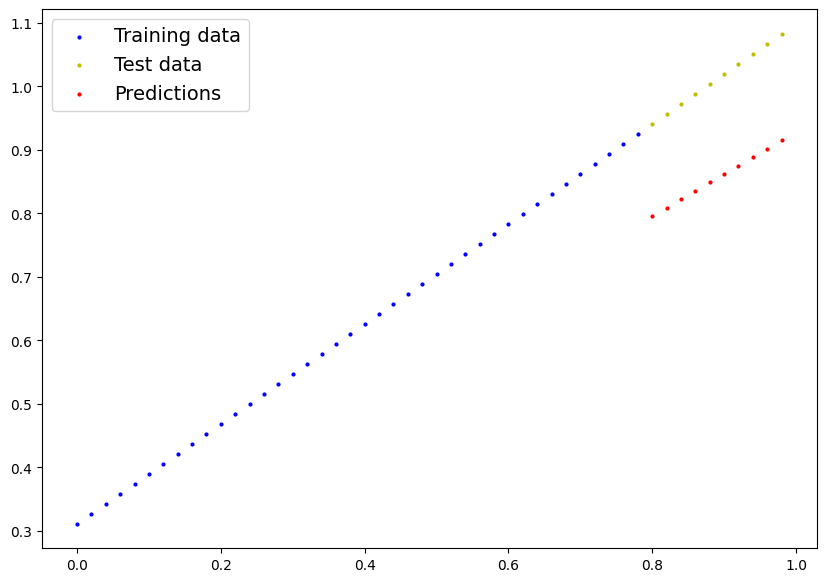

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
ypreds = model_0(X_test)
ypreds

tensor([[0.7960],
        [0.8092],
        [0.8225],
        [0.8357],
        [0.8489],
        [0.8621],
        [0.8754],
        [0.8886],
        [0.9018],
        [0.9150]], grad_fn=<AddBackward0>)

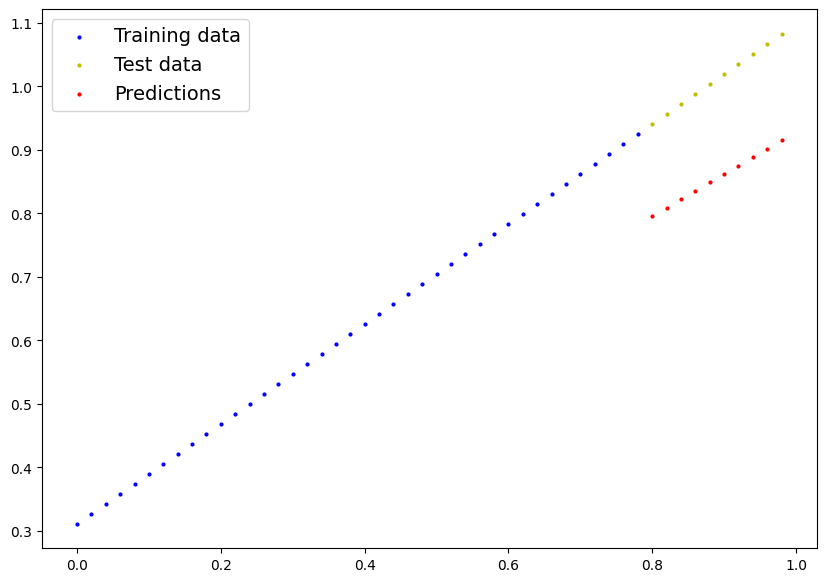

In [ ]:
plot_predictions(predictions=ypreds.detach().numpy())

 ### 3. Train model

The whole idea of training is for a model to move from some *unkonwn* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation o the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* **Note:** Loss function may also be called cost function or criterion in different ares. For our case, we're going to refer to it as a loss.


Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case) to improve thw loss function.


And specifically for PyTorch, we need:
1. A training loop
2. A test loop

In [ ]:
# Check out our model's parameters (a parameter is a value that a model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.6614])), ('bias', tensor([0.2669]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer  = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.01) # lr = larning rate = possibly the most important hyperparameter that er can set

In [ ]:
# An epoch is one loop yhrough data... (this is a hyper parameter because we have set it ourselves)
epochs = 80

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that reqire gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss:{loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()  # zero the gradient of the optimizer , they accumulte by default

  # 4. Perform back propagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.... we have to zero them above in step 3 fo rthe next iteration of the loop

  ### Testing
  model_0.eval() # turn off dofferent settings in the model not needed for evaluation/testing (gradient tracking, dropout, batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scene
    # 1. Do forward pass
    test_pred = model_0(X_test)

    # 2. Calculate test loss
    test_loss = loss_fn(test_pred,y_test)

  # Print out what's appening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print out model state_dict
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.09342252463102341 | Test loss: 0.14307546615600586
OrderedDict([('weights', tensor([0.6653])), ('bias', tensor([0.2769]))])
Epoch: 10 | Loss: 0.018350442871451378 | Test loss: 0.04615689441561699
OrderedDict([('weights', tensor([0.7000])), ('bias', tensor([0.3429]))])
Epoch: 20 | Loss: 0.014179456047713757 | Test loss: 0.0324515700340271
OrderedDict([('weights', tensor([0.7188])), ('bias', tensor([0.3399]))])
Epoch: 30 | Loss: 0.010741723701357841 | Test loss: 0.024179041385650635
OrderedDict([('weights', tensor([0.7359])), ('bias', tensor([0.3329]))])
Epoch: 40 | Loss: 0.007305963896214962 | Test loss: 0.016593385487794876
OrderedDict([('weights', tensor([0.7529])), ('bias', tensor([0.3254]))])
Epoch: 50 | Loss: 0.0038769193924963474 | Test loss: 0.008320862427353859
OrderedDict([('weights', tensor([0.7700])), ('bias', tensor([0.3184]))])
Epoch: 60 | Loss: 0.004001846071332693 | Test loss: 0.011792999692261219
OrderedDict([('weights', tensor([0.7791])), ('bias', ten

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7830])), ('bias', tensor([0.3169]))])

In [ ]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

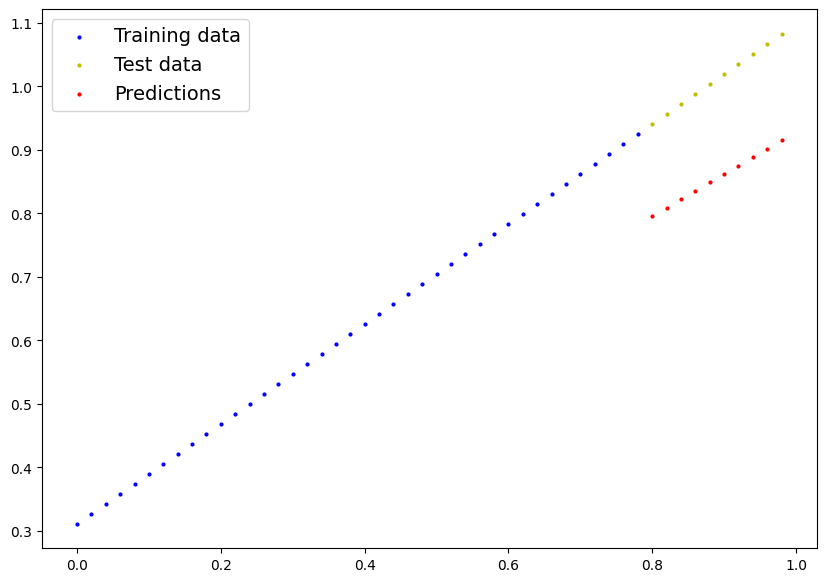

In [ ]:
plot_predictions(predictions=y_preds)

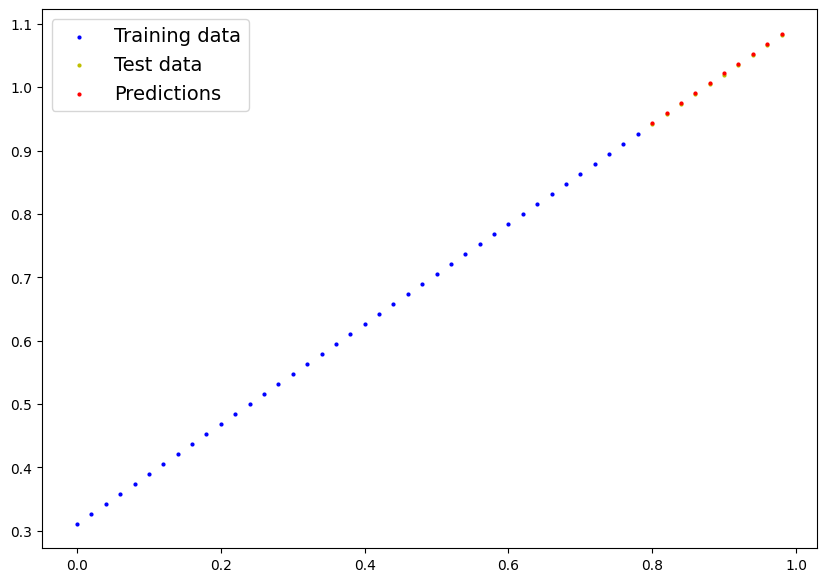

In [ ]:
plot_predictions(predictions=y_preds_new)

plot_predictions(predictions=y_preds_new)

plot_predictions(predictions=y_preds_new)

plot_predictions(predictions=y_preds_new)

plot_predictions(predictions=y_preds_new)

plot_predictions(predictions=y_preds_new)

plot_predictions(predictions=y_preds_new)

In [ ]:
epoch_count ,loss_values, test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70],
 [tensor(0.0934, grad_fn=<MeanBackward0>),
  tensor(0.0184, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0040, grad_fn=<MeanBackward0>),
  tensor(0.0040, grad_fn=<MeanBackward0>)],
 [tensor(0.1431),
  tensor(0.0462),
  tensor(0.0325),
  tensor(0.0242),
  tensor(0.0166),
  tensor(0.0083),
  tensor(0.0118),
  tensor(0.0118)])

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy())

array([0.09342252, 0.01835044, 0.01417946, 0.01074172, 0.00730596,
       0.00387692, 0.00400185, 0.00400185], dtype=float32)

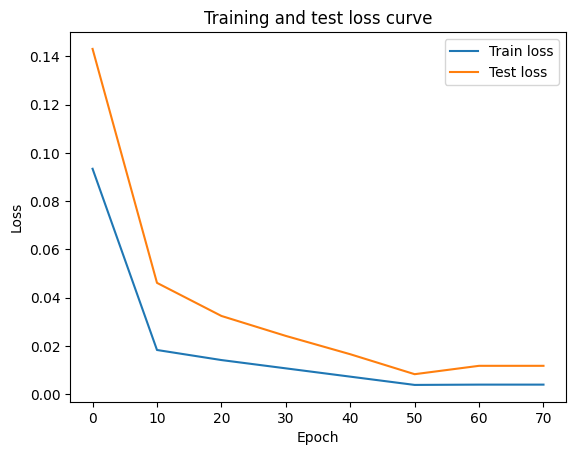

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

### Saving a model in PyTorch

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create PyTorch_models directory
model_path = Path("PyTorch_models")
model_path.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
model_name = "02_workflow_model_0.pth"
model_save_path = model_path / model_name

# 3. Save the model state_dict
print(f"Saving model to: {model_save_path}")
torch.save(model_0.state_dict(),
           f=model_save_path)

Saving model to: PyTorch_models/02_workflow_model_0.pth


In [ ]:
!ls -l PyTorch_models

total 4
-rw-r--r-- 1 root root 1111 Jul  1 09:55 02_workflow_model_0.pth


## Loading a PyTorch model

Since we saved our model's `satae_dict()`rather the entire model, we'll we will create a new instance of our model class and load the saved `state_dict()`` into that.



In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7830])), ('bias', tensor([0.3169]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of ouor model class.
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7830])), ('bias', tensor([0.3169]))])

In [ ]:
# Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.9433],
        [0.9589],
        [0.9746],
        [0.9903],
        [1.0059],
        [1.0216],
        [1.0372],
        [1.0529],
        [1.0686],
        [1.0842]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])